# Read the configuration files

## Create the crowd object

In [2]:
from pathlib import Path
import configuration.backup.dict_to_xml_and_reverse as fun_xml
from configuration.models.crowd import create_agents_from_dynamic_static_geometry_parameters

# Open the configuration files, read them, and convert them to dictionaries
config_files_folder_path = Path.cwd().parent.parent / "data" / "xml" / "crowd2D_ANSURII_tutorial"

with open(config_files_folder_path / "Agents.xml", encoding="utf-8") as f:
    crowd_xml = f.read()
static_dict = fun_xml.static_xml_to_dict(crowd_xml)

with open(config_files_folder_path / "Geometry.xml", encoding="utf-8") as f:
    geometry_xml = f.read()
geometry_dict = fun_xml.geometry_xml_to_dict(geometry_xml)

with open(config_files_folder_path / "AgentDynamics.xml", encoding="utf-8") as f:
    dynamic_xml = f.read()
dynamic_dict = fun_xml.dynamic_xml_to_dict(dynamic_xml)

# Create the Crowd object and populate it with the data from the dictionaries
crowd = create_agents_from_dynamic_static_geometry_parameters(
    static_dict=static_dict,
    dynamic_dict=dynamic_dict,
    geometry_dict=geometry_dict,
)

## Display the crowd

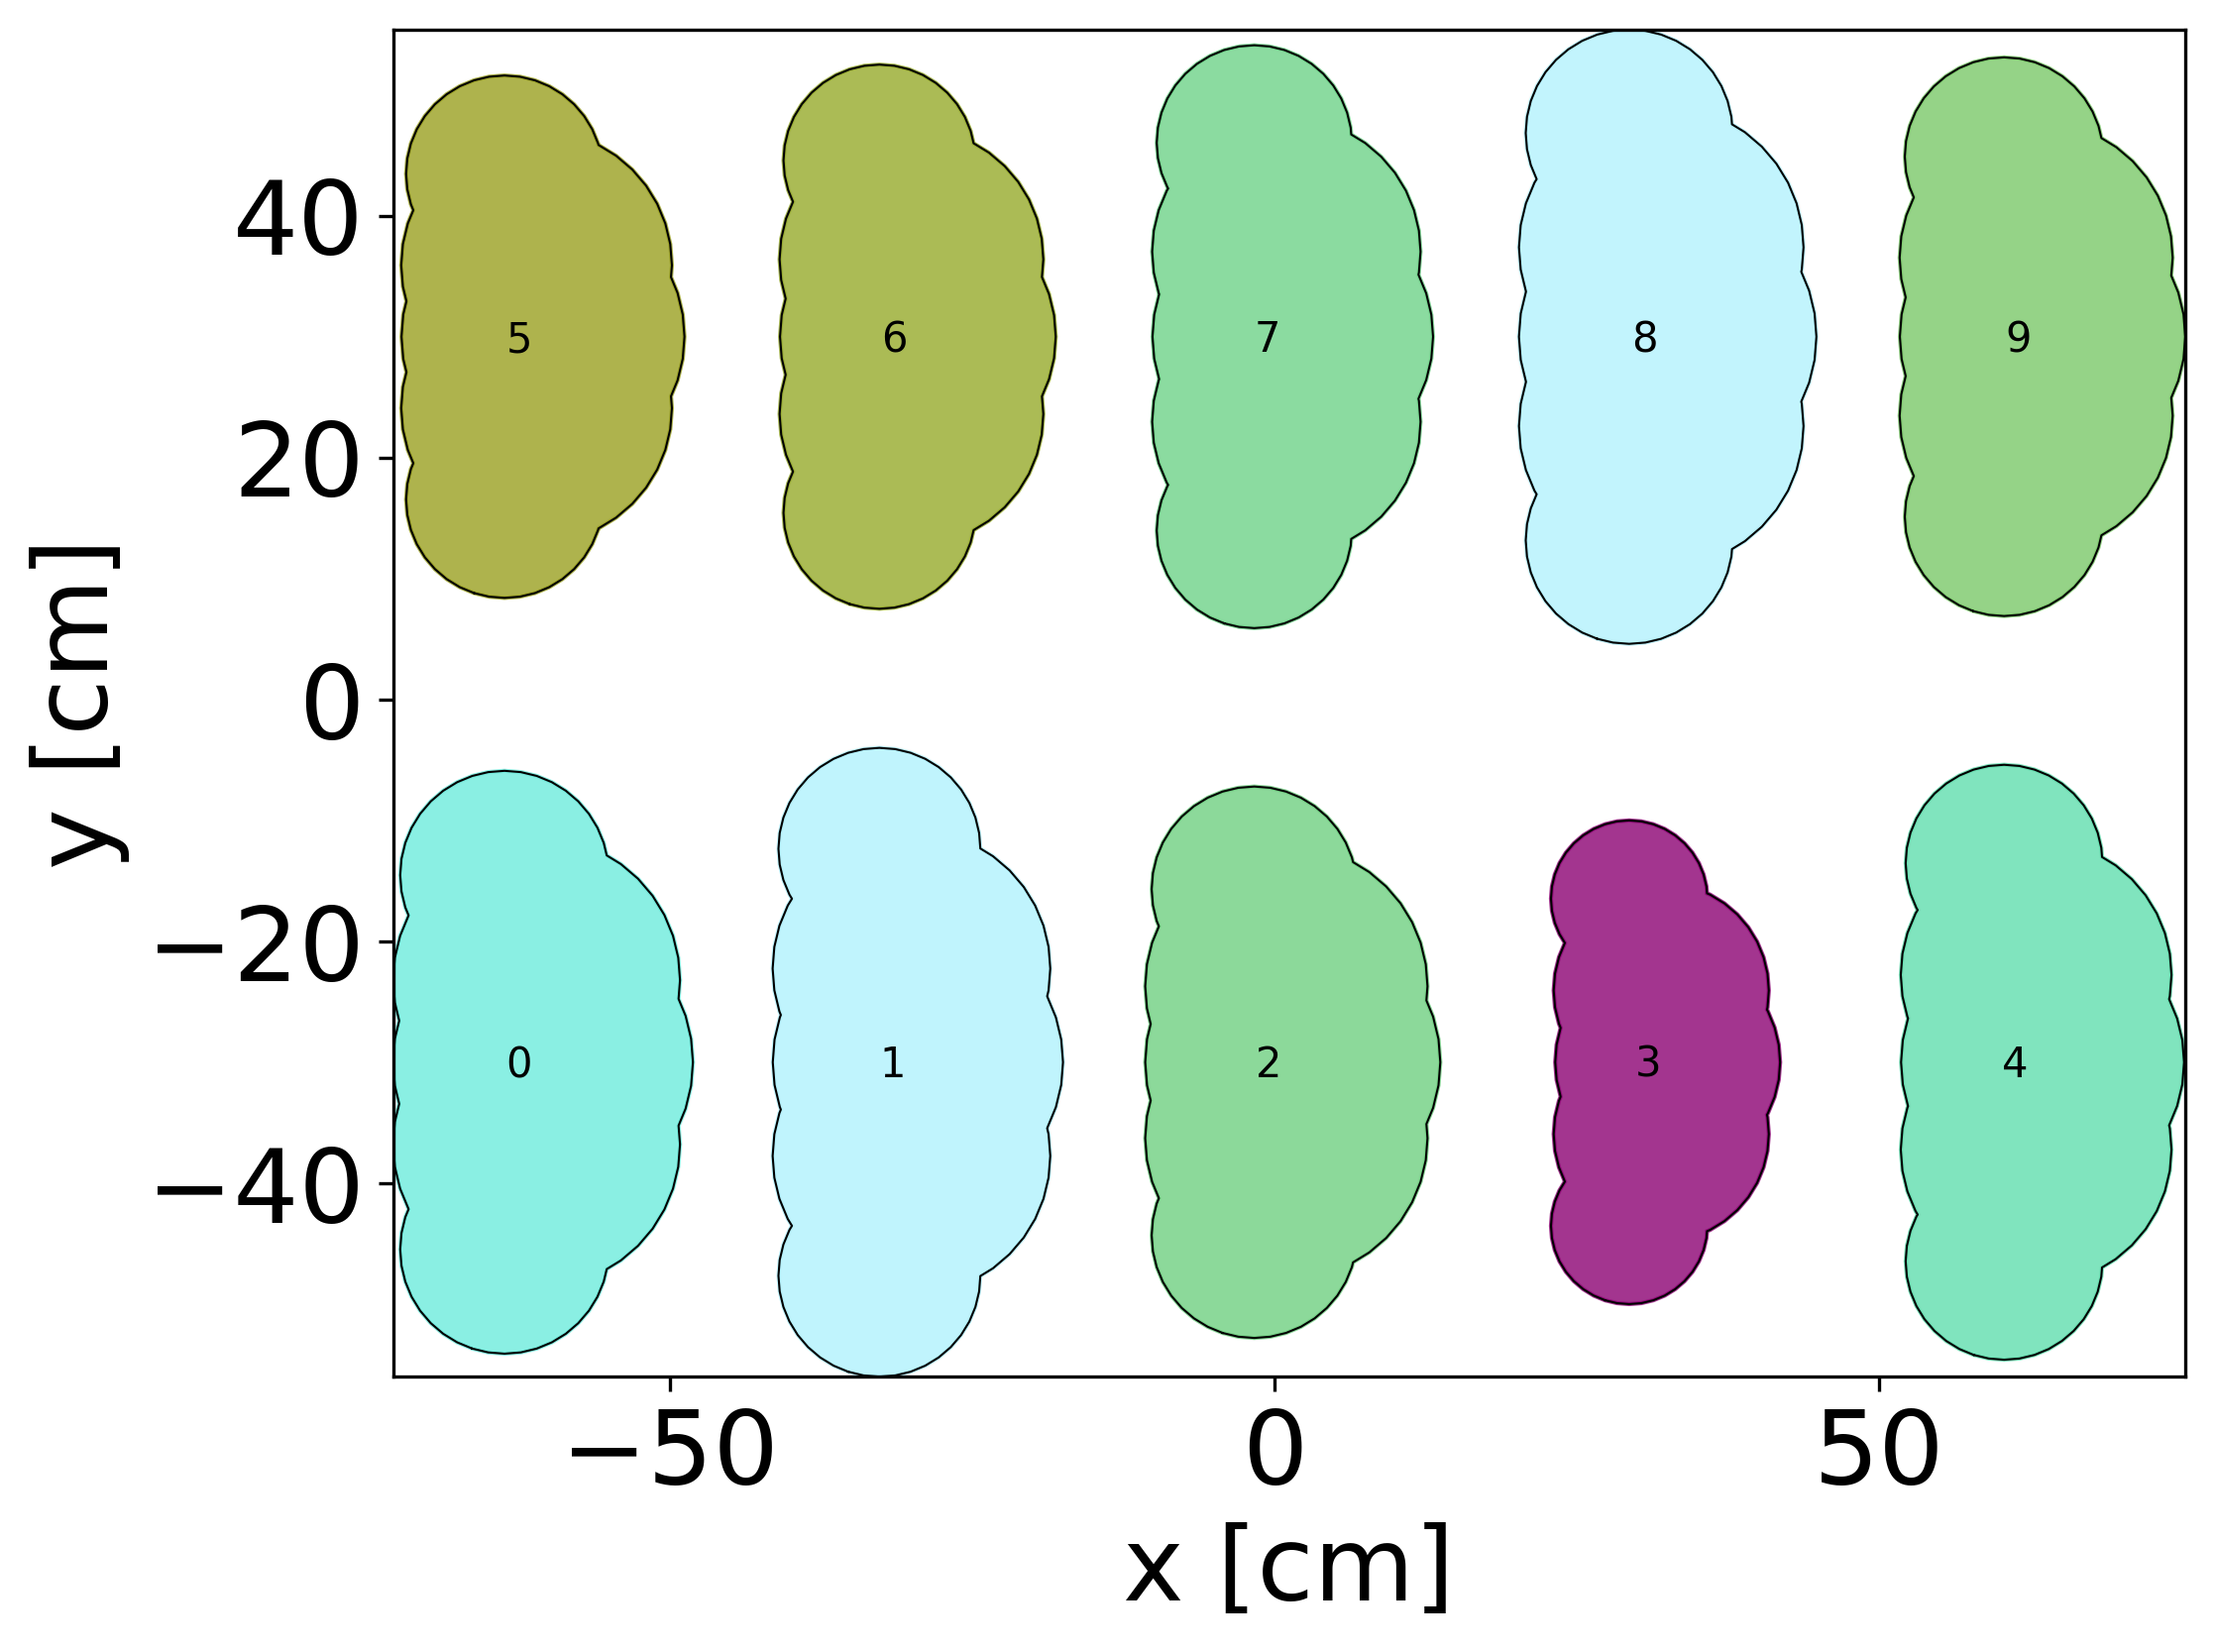

In [3]:
from streamlit_app.plot import plot
import matplotlib.pyplot as plt

plot.display_crowd2D(crowd)
plt.show()

## Get some anthropometric statistics from the created crowd

In [4]:
import configuration.utils.functions as fun
import pprint

crowd_statistics = crowd.get_crowd_statistics()

# Print the crowd statistics
pprint.pprint(fun.filter_dict_by_not_None_values(crowd_statistics["measures"]))

{'bike_proportion': 0.0,
 'male_bideltoid_breadth_max': 52.0,
 'male_bideltoid_breadth_mean': 46.839999999999996,
 'male_bideltoid_breadth_min': 40.0,
 'male_bideltoid_breadth_std_dev': 3.604688305218327,
 'male_chest_depth_max': 24.8,
 'male_chest_depth_mean': 23.28,
 'male_chest_depth_min': 18.6,
 'male_chest_depth_std_dev': 1.7668553358375938,
 'male_height_max': 183.0,
 'male_height_mean': 173.3,
 'male_height_min': 160.0,
 'male_height_std_dev': 7.379400758568107,
 'male_proportion': 1.0,
 'male_weight_max': 86.18,
 'male_weight_mean': 71.849,
 'male_weight_min': 56.7,
 'male_weight_std_dev': 9.737257713431323,
 'pedestrian_proportion': 1.0}


In [5]:
# Print the numbers observables
pprint.pprint(crowd_statistics["stats_counts"])

{'bike_number': 0, 'male_number': 10, 'pedestrian_number': 10}


In [6]:
# Print the detailed distribution of the other observables
pprint.pprint(fun.filter_dict_by_not_None_values(crowd_statistics["stats_lists"]))

{'male_bideltoid_breadth': [48.199999999999996,
                            52.0,
                            45.6,
                            40.0,
                            49.2,
                            43.2,
                            45.0,
                            48.2,
                            50.8,
                            46.2],
 'male_chest_depth': [24.8,
                      24.0,
                      24.4,
                      18.6,
                      23.400000000000002,
                      23.400000000000002,
                      22.8,
                      23.200000000000003,
                      24.6,
                      23.599999999999998],
 'male_height': [178.0,
                 183.0,
                 178.0,
                 160.0,
                 180.0,
                 168.0,
                 170.0,
                 173.0,
                 178.0,
                 165.0],
 'male_weight': [75.75,
                 86.18,
                 70